# 필요모듈 설치 및 데이터 불러오기

```
https://aihub.or.kr/opendata/keti-data/recognition-laguage/KETI-02-010
AIHub의 한국어 정보가 담긴 연속적 대화 데이터셋을 기반으로 함
연속적인 대화의 각 문장에 7가지 클래스의 감정이 라벨링 되어있음.
```

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
!pip install konlpy

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded
Reading package lists... Done
Building dep

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rc('font', family='NanumBarunGothic') 

from wordcloud import WordCloud
from wordcloud import STOPWORDS 
import numpy as np
from PIL import Image
from wordcloud import ImageColorGenerator
import pandas as pd

data = pd.read_excel("/content/drive/MyDrive/텍스트데이터분석/중간대체과제/Chatbot_data-master/한국어연속적대화데이터셋(감정분류).xlsx")

In [ ]:
data

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,행복,중립,슬픔,공포,혐오,분노,놀람
0,dialog #,발화,감정,NaN,NaN,1030.0,NaN,NaN,NaN,NaN,NaN,NaN
1,S,아 진짜! 사무실에서 피지 말라니깐! 간접흡연이 얼마나 안좋은데!,분노,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,그럼 직접흡연하는 난 얼마나 안좋겠니? 안그래? 보면 꼭... 지 생각만 하고.,혐오,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,손님 왔어요.,중립,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,손님? 누구?,중립,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
55624,S,얘긴 다 끝났냐? 원예부,중립,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
55625,NaN,"예. 그거 때문에, 부탁이 있......는......데요.",중립,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
55626,NaN,여자 숨겨달라는거면 사절이다.,중립,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
55627,NaN,아무래도 안되나요?,중립,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 데이터 전처리

In [ ]:
# dataframe의 필요한 부분만 가져오기
data = data.rename(columns = data.iloc[0])
data = data.iloc[1: , 1:3]
data = data[data["감정"].isin(['분노', '혐오', '중립', '놀람', '행복', '공포', '슬픔'])]


# 라벨링된 감정에 따라 나누어 하나의 텍스트와 문장 개수를 반환하는 함수(문장 개수당 느낌표와 물음표 사용 개수 계산 위한) 사용
def text_classification(emotion):
  text = ""
  sen_list = []
  sen_cnt = data[data["감정"] == emotion].shape[0]
  for sentence in data[data["감정"] == emotion]["발화"]:
    text += sentence
    sen_list.append(sentence)
  return sen_list, text, sen_cnt

mad_list, mad_text, mad_cnt = text_classification("분노")
hate_list, hate_text, hate_cnt = text_classification("혐오")
mid_list, mid_text, mid_cnt = text_classification("중립")
sur_list, sur_text, sur_cnt = text_classification("놀람")
hap_list, hap_text, hap_cnt = text_classification("행복")
sca_list, sca_text, sca_cnt = text_classification("공포")
sad_list, sad_text, sad_cnt = text_classification("슬픔")

# 특수문자(느낌표, 물음표) 사용 빈도 분석
보고서 4-2, 5-2

In [ ]:
def q_e_classification(text, text_cnt):
  q_cnt = text.count("?")
  e_cnt = text.count("!")
  return round(q_cnt/text_cnt, 2), round(e_cnt/text_cnt, 2)

mad_q_cnt, mad_e_cnt = q_e_classification(mad_text, mad_cnt)
hate_q_cnt, hate_e_cnt = q_e_classification(hate_text, hate_cnt)
mid_q_cnt, mid_e_cnt = q_e_classification(mid_text, mid_cnt)
sur_q_cnt, sur_e_cnt = q_e_classification(sur_text, sur_cnt)
hap_q_cnt, hap_e_cnt = q_e_classification(hap_text, hap_cnt)
sca_q_cnt, sca_e_cnt = q_e_classification(sca_text, sca_cnt)
sad_q_cnt, sad_e_cnt = q_e_classification(sad_text, sad_cnt)

In [ ]:
q_e_df = pd.DataFrame({"분노" : [mad_q_cnt, mad_e_cnt],
                       "혐오" : [hate_q_cnt, hate_e_cnt],
                       "중립" : [mid_q_cnt, mid_e_cnt],
                       "놀람" : [sur_q_cnt, sur_e_cnt],
                       "행복" : [hap_q_cnt, hap_e_cnt],
                       "공포" : [sca_q_cnt, sca_e_cnt],
                       "슬픔" : [sad_q_cnt, sad_e_cnt]}, index = ["문장 당 물음표 비율", "문장 당 느낌표 비율"])
q_e_df

,분노,혐오,중립,놀람,행복,공포,슬픔
문장 당 물음표 비율,0.71,0.51,0.43,1.07,0.34,0.37,0.32
문장 당 느낌표 비율,0.95,0.16,0.07,0.27,0.38,0.37,0.10


<Figure size 1440x864 with 0 Axes>

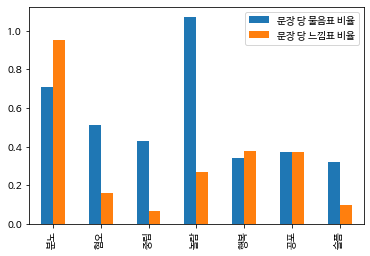

In [ ]:
plt.figure(figsize = (20, 12))
q_e_df.T.plot.bar()
plt.show()

### 비교 결과 “놀람” 클래스에 있어서 물음표의 비율이 압도적으로 높은 것으로 확인됐고, 이는 놀람이라는 감정을 느낌표를 통해 표현하는 경우가 많다고 해석된다. 또한 느낌표와 물음표 모두 “분노” 클래스에서 sentence 당 높은 비율로 사용되는 것이 확인되었다.
### 특수기호의 사용 빈도에 따라 유의미한 결과가 있음을 확인했고, 챗봇 모델의 감정분류 엔진에 반영할 방법을 보고서에 작성했다.

# 1.konlpy를 통한 형태소 분석 및 워드클라우드

In [ ]:
from konlpy.tag import Komoran
komoran = Komoran()

In [ ]:
"""
문서로부터 주요 품사 고빈도 어휘 출력
"""
   
def split_sentences(text):    # 하나의 문서를 여러문장으로 나누기
    import re    
    all_sentences = []    
    lines = [line for line in text.strip().splitlines() if line.strip()]
    
    for line in lines:
        sentences = re.split("(?<=[.?!])\s+", line)
        all_sentences += sentences
    
    return all_sentences



def get_sentences(input_file_name):  #파일 불러오기
    
    sentences = []
    
    with open(input_file_name, "r", encoding="utf-8") as input_file:
        for sentence in input_file:
            sub_sentences = split_sentences(sentence)  # 호출
            sentences += sub_sentences
    
    return sentences



def get_parts(sentences):   #코로란 형태소 분석기 실행
    
    from konlpy.tag import Komoran
    
    komoran = Komoran()
    results = []
    
    for sentence in sentences:
        parts = komoran.pos(sentence)
        for part in parts:
            results.append(part)
    
    return results


def filtered_parts(parts): # 주요품사만 추출
    
    N_POS = ["NNG", "NNP"]  # NNG : 일반명사, NNP : 고유명사
    V_POS = ["VV", "VA"]    # "VV" : 동사, "VA" : 형용사
    X_POS = ["XR"]          # "XR" : 어근
    M_POS = ["MAG", "MAJ"]   # "MAG": 일반부사, "MAJ" : 접속부사

    filtered_count = {"N_POS" : 0, "V_POS" : 0, "X_POS" : 0, "M_POS" : 0}
    
    for part in parts:
        if part[1] in N_POS:
            filtered_count["N_POS"] += 1
        elif part[1] in V_POS:
            filtered_count["V_POS"] += 1 
        elif part[1] in X_POS:
            filtered_count["X_POS"] += 1 
        elif part[1] in M_POS:
            filtered_count["M_POS"] += 1 
        else:
            continue                
    return filtered_count


def word_count(filtered):    #빈도 체크하고 정렬
    from collections import Counter    
    wordform_counter = Counter()

    for word in filtered:
        wordform_counter[word] += 1    
   # most_common() 순서대로 보여줌
    for word, count in wordform_counter.most_common(10):  # most_common(10) 10개 추출
        print("{}: {}".format(word, count))    
    
def main(sentences):    
    parts = get_parts(sentences)     
    filtered = filtered_parts(parts)        
    return parts, filtered

#### 각 감정 클래스 별 텍스트 비교

In [ ]:
mad_parts, mad_filtered = main(mad_list)
hate_parts, hate_filtered = main(hate_list)
mid_parts, mid_filtered = main(mid_list)
sur_parts, sur_filtered = main(sur_list)
hap_parts, hap_filtered = main(hap_list)
sca_parts, sca_filtered = main(sca_list)
sad_parts, sad_filtered = main(sad_list)

mad_nouns = [tup[0] for tup in mad_parts if tup[1][0] == "N"]
hate_nouns = [tup[0] for tup in hate_parts if tup[1][0] == "N"]
mid_nouns = [tup[0] for tup in mid_parts if tup[1][0] == "N"]
sur_nouns = [tup[0] for tup in sur_parts if tup[1][0] == "N"]
hap_nouns = [tup[0] for tup in hap_parts if tup[1][0] == "N"]
sca_nouns = [tup[0] for tup in sca_parts if tup[1][0] == "N"]
sad_nouns = [tup[0] for tup in sad_parts if tup[1][0] == "N"]

In [ ]:
def cnt_dict(text):
    dic = dict()
    for word in text:
      if word in dic.keys():
        dic[word] += 1
      else:
        dic[word] = 1
    return dic

mad_dic  = cnt_dict(mad_nouns)
hate_dic = cnt_dict(hate_nouns)
mid_dic  = cnt_dict(mid_nouns)
sur_dic  = cnt_dict(sur_nouns)
hap_dic = cnt_dict(hap_nouns)
sca_dic  = cnt_dict(sca_nouns)
sad_dic = cnt_dict(sad_nouns)

#### 명사 비교

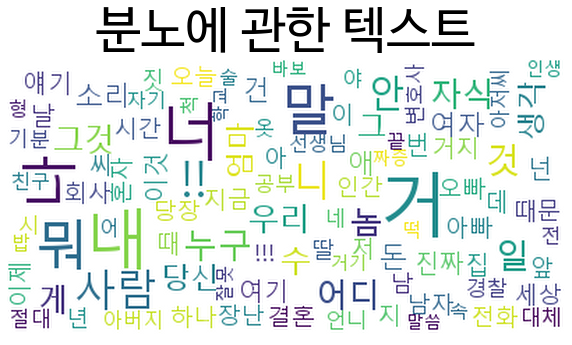

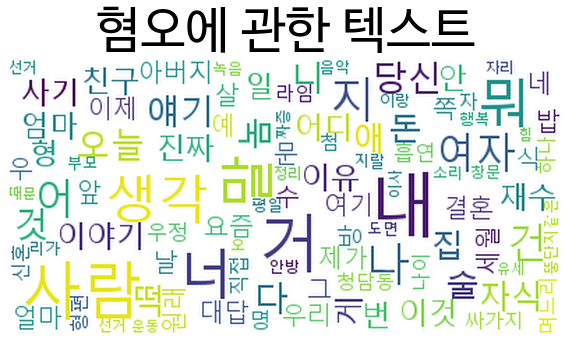

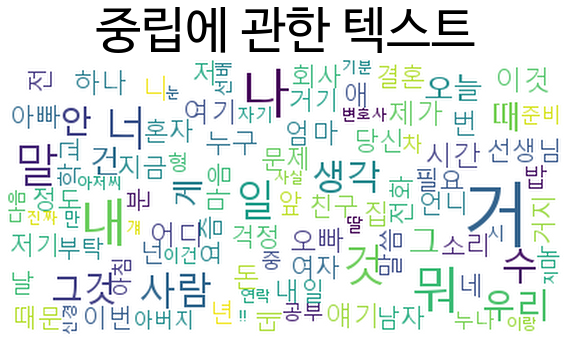

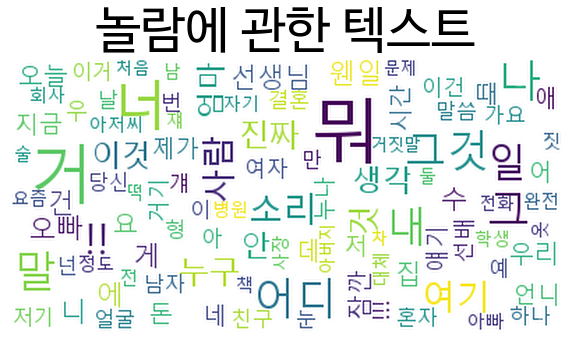

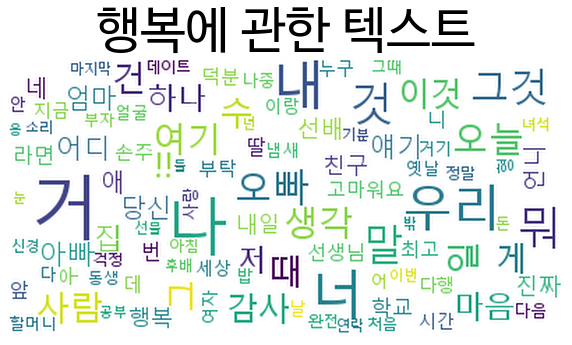

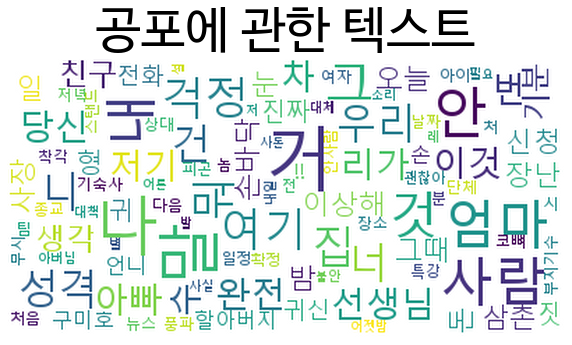

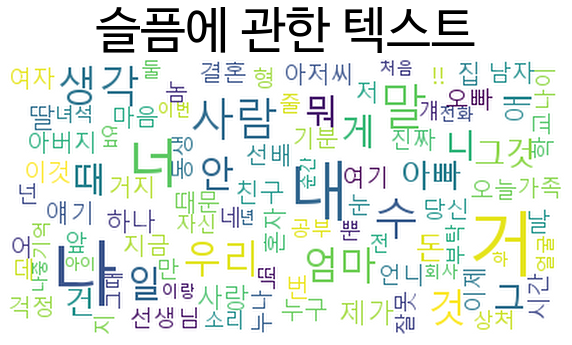

In [ ]:
stopwords = set(STOPWORDS)    
stopwords.update([""])   

#img_mask = np.array(Image.open("star.jpg")) 
#image_colors = ImageColorGenerator(img_mask)
 
FONTPATH =  "malgun.ttf"   

wordcloud = WordCloud(max_font_size = 50, max_words = 100,
                      stopwords=stopwords,background_color='white',
                      random_state=10,
                      font_path = FONTPATH)

dic_set = [mad_dic, hate_dic, mid_dic, sur_dic, hap_dic, sca_dic, sad_dic]
word_set = ['분노', '혐오', '중립', '놀람', '행복', '공포', '슬픔']
for dic, word in zip(dic_set, word_set):
  wc = wordcloud.generate_from_frequencies(dic)
  plt.figure(figsize = (10, 10))
  plt.imshow(wc, interpolation = "lanczos")
  plt.title(f"{word}에 관한 텍스트", fontsize = 50)
  plt.axis("off")

In [ ]:
for dic, word in zip(dic_set, word_set):
  print(f"{word_set}")

In [ ]:
mad_vs = [tup[0] for tup in mad_parts if tup[1][0] == "V"]
hate_vs = [tup[0] for tup in hate_parts if tup[1][0] == "V"]
mid_vs = [tup[0] for tup in mid_parts if tup[1][0] == "V"]
sur_vs = [tup[0] for tup in sur_parts if tup[1][0] == "V"]
hap_vs = [tup[0] for tup in hap_parts if tup[1][0] == "V"]
sca_vs = [tup[0] for tup in sca_parts if tup[1][0] == "V"]
sad_vs = [tup[0] for tup in sad_parts if tup[1][0] == "V"]

In [ ]:
mad_dic  = cnt_dict(mad_vs)
hate_dic = cnt_dict(hate_vs)
mid_dic  = cnt_dict(mid_vs)
sur_dic  = cnt_dict(sur_vs)
hap_dic = cnt_dict(hap_vs)
sca_dic  = cnt_dict(sca_vs)
sad_dic = cnt_dict(sad_vs)

#### 용언 비교

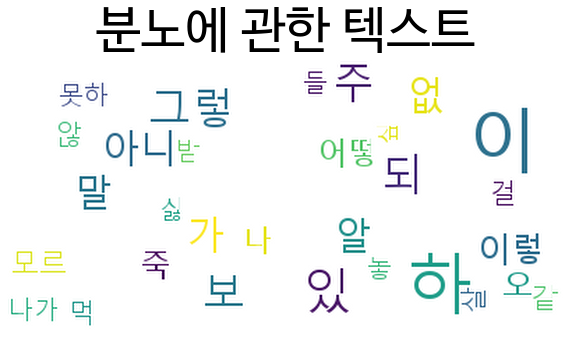

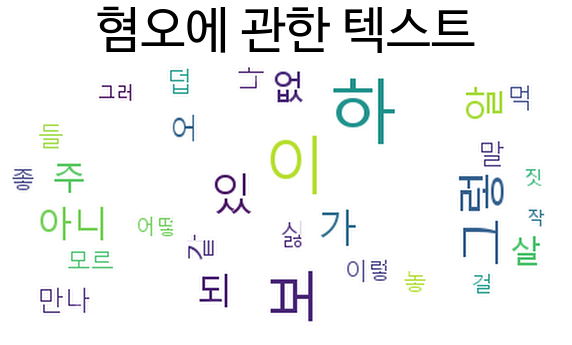

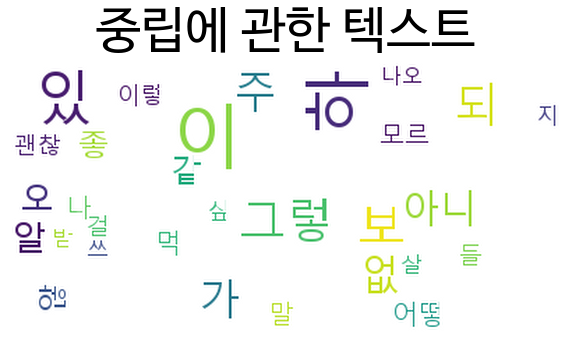

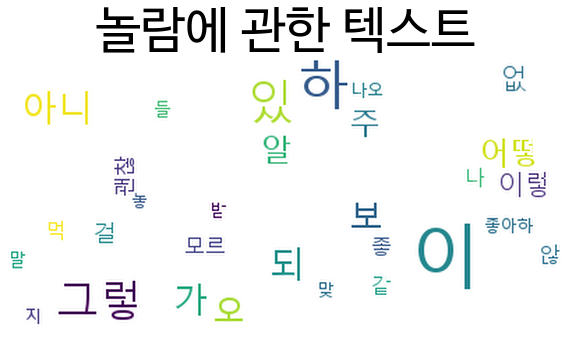

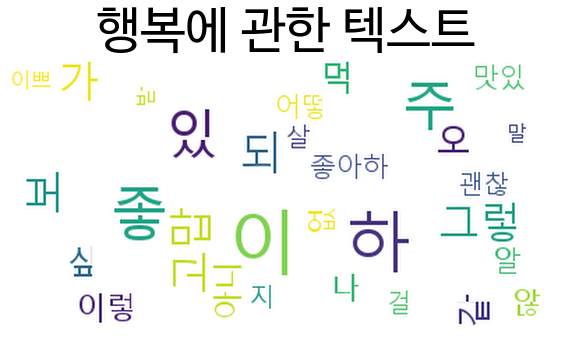

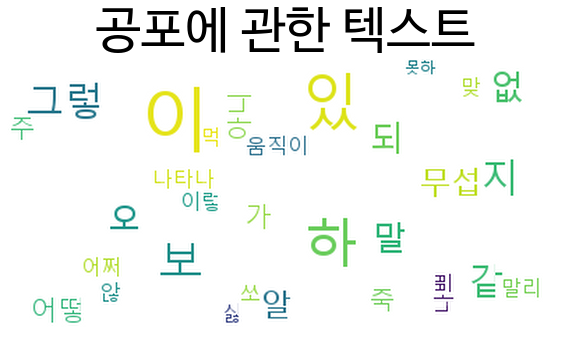

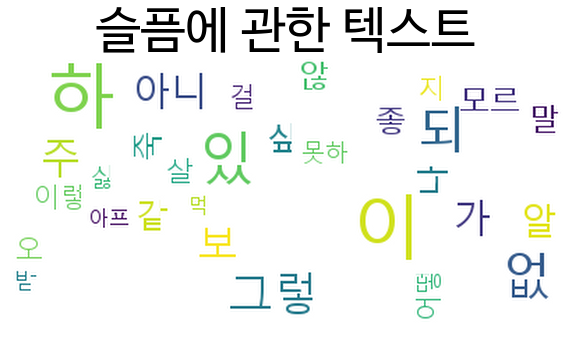

In [ ]:
stopwords = set(STOPWORDS)    
stopwords.update(["보", "이", "하"])   

#img_mask = np.array(Image.open("star.jpg")) 
#image_colors = ImageColorGenerator(img_mask)
 
FONTPATH =  "malgun.ttf"   

wordcloud = WordCloud(max_font_size = 50, max_words = 1000,
                      stopwords=stopwords,background_color='white',
                      random_state=10,
                      font_path = FONTPATH)

dic_set = [mad_dic, hate_dic, mid_dic, sur_dic, hap_dic, sca_dic, sad_dic]
word_set = ['분노', '혐오', '중립', '놀람', '행복', '공포', '슬픔']
for dic, word in zip(dic_set, word_set):
  wc = wordcloud_.generate_from_frequencies(dic)
  plt.figure(figsize = (10, 10))
  plt.imshow(wc, interpolation = "lanczos")
  plt.title(f"{word}에 관한 텍스트", fontsize = 50)
  plt.axis("off")

#### 감정 클래스 별 각 형태소별 비율 비교

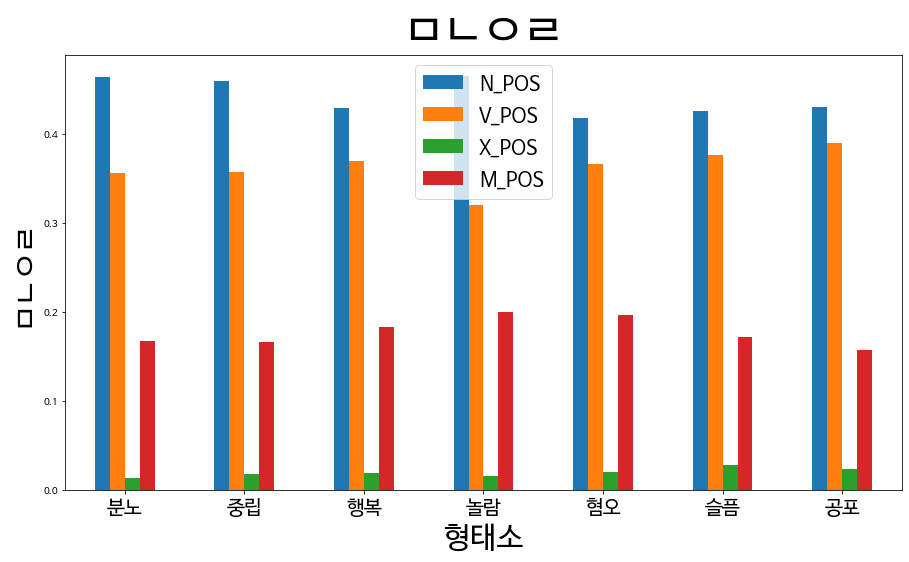

In [ ]:
data = pd.DataFrame(mad_filtered, index = ["분노"])
data.loc["중립"] = mid_filtered.values()
data.loc["행복"] = hap_filtered.values()
data.loc["놀람"] = sur_filtered.values()
data.loc["혐오"] = hate_filtered.values()
data.loc["슬픔"] = sad_filtered.values()
data.loc["공포"] = sca_filtered.values()

data = data.T
for col in data.columns:
  data[col] = data[col]/ data[col].sum()

figure, ax = plt.subplots(1, 1, figsize = (15, 8))
data.T.plot.bar(ax = ax, style = "ggplot")
plt.title("감정 클래스 별 각 형태소별 비율", fontsize = 45)
plt.xlabel("형태소", fontsize = 30)
plt.ylabel("감정 클래스 별 각 형태소별 비율", fontsize = 30)
plt.xticks(rotation = 0, fontsize = 20)
plt.legend(fontsize = 20)
plt.show()

#### 각 클래스 내에서 각 형태소가 차지하는 비중은 큰 차이가 있다고 보기 어렵다. 고민을 털어놓는 구어체 형식이기 때문에 어느 정도의 스토리텔링 방식이 비슷하다고 보여진다.